In [ ]:
%load_ext autoreload
%autoreload 2

# seds

> Using HACC-hydro star formation history and metallicity information to generate SEDs

In [ ]:
#| default_exp seds

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
#| export
import numpy as np
import math
import sys, os
import fsps
from astropy.cosmology import *
import matplotlib.pylab as plt
from colossus.cosmology import cosmology
import haccytrees.mergertrees

In [ ]:
#| export
def adding(a, # first variable
          b,  #second variable
          c): #third variable
    '''
    Adding 3 numbers 
    '''
    d = a + b+ c
    return d

Using $$\sum_{i=1}^{k+1}i$$

In [ ]:
#| export
def autoscale_y(ax,margin=0.1):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""


    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        y_displayed = yd[((xd>lo) & (xd<hi))]
        h = np.max(y_displayed) - np.min(y_displayed)
        bot = np.min(y_displayed)-margin*h
        top = np.max(y_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_ylim(bot,top)

In [ ]:
#| export
def cosmo_redshifting(DL_Gpc=0.0, # Luminosity distance (LD) in unit of Gpc. If this parameter is not zero, the LD will not be calculated using the Astropy Cosmology package. 
                      cosmo='flat_LCDM', # Choices for the cosmological parameters. The choices are: ['flat_LCDM', 'WMAP5',  'WMAP7', 'WMAP9', 'Planck13', 'Planck15'], similar to the choices available in the  Astropy Cosmology package: https://docs.astropy.org/en/stable/cosmology/#built-in-cosmologies. If 'flat_LCDM' is chosen, the input H0 and Om0 should be provided.
                      H0=70.0, # Hubble constant at z=0.
                      Om0=0.3, # Omega matter at z=0.
                      z=0.01, # Redshift.
                      wave=[], # Wavelength grids of the input spectrum.
                      spec=[]): # Fluxes of the input spectrum.  
    """
    returns redsh_wave: Wavelength grids of the redshifted spectrum
    returns redsh_spec: Fluxes of redshifted spectrum. 
    """

    if DL_Gpc > 0.0:
        DL = DL_Gpc
        DL = DL*3.08568e+27
    else:
        if cosmo=='flat_LCDM' or cosmo==0:
            cosmo1 = FlatLambdaCDM(H0=H0, Om0=Om0)
            DL = cosmo1.luminosity_distance(z)      # in unit of Mpc
        elif cosmo=='WMAP5' or cosmo==1:
            DL = WMAP5.luminosity_distance(z)
        elif cosmo=='WMAP7' or cosmo==2:
            DL = WMAP7.luminosity_distance(z)
        elif cosmo=='WMAP9' or cosmo==3:
            DL = WMAP9.luminosity_distance(z)
        elif cosmo=='Planck13' or cosmo==4:
            DL = Planck13.luminosity_distance(z)
        elif cosmo=='Planck15' or cosmo==5:
            DL = Planck15.luminosity_distance(z)
        #elif cosmo=='Planck18' or cosmo==6:
        #    DL = Planck18.luminosity_distance(z)
        
        DL = DL.value/1.0e+3
        DL = DL*3.08568e+27

    redsh_wave = (1.0+z)*np.asarray(wave)
    cor = 1.0/12.56637061/DL/DL/(1.0+z)           # flux in L_solar cm^-2 A^-1
    cor = cor*3.826e+33                           # flux in erg s^-1 cm^-2 A^-1
    redsh_spec = cor*np.asarray(spec)

    return redsh_wave, redsh_spec

In [ ]:
#| export
def convert_unit_spec_from_ergscm2A(wave, # wavelength
                                    spec, # SEDs
                                    funit='Jy'): #Units
    """
    A function to convert unit of flux from 'erg/s/cm2/A' --> 'erg/s/cm2' or 'Jy'
    """
    if funit=='erg/s/cm2/A' or funit==0:
        spec_new = spec
    elif funit=='erg/s/cm2' or funit==1:
        spec_new = np.asarray(spec)*np.asarray(wave)
    elif funit=='Jy' or funit==2:
        spec_new = np.asarray(spec)*np.asarray(wave)*np.asarray(wave)/1.0e-23/2.998e+18
    else:
        print ("The input funit is not recognized!")
        sys.exit()

    return spec_new

In [ ]:
#| export
def cosmology_model(sim_name):
    # Cosmic Age of all snapshots
    sim = haccytrees.Simulation.simulations[sim_name]

    cosmo = cosmology.setCosmology(sim_name, dict(
        flat=True,
        H0=sim.cosmo.h*100,
        Om0=sim.cosmo.Omega_m,
        Ob0=sim.cosmo.Omega_b,
        sigma8=sim.cosmo.s8,
        ns=sim.cosmo.ns
    ))
    return cosmo

In [ ]:
#| export
def load(hacc_sfh_file):
    cosmo = cosmology_model("AlphaQ")
    hacc_hydro_sm = np.loadtxt(hacc_sfh_file)
    hydro_sm = hacc_hydro_sm[:, 0]
    hydro_tt = cosmo.age(hacc_hydro_sm[:, 1])
    return hydro_sm, hydro_tt

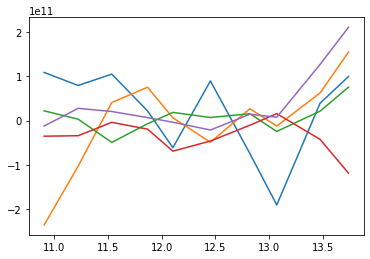

In [ ]:
dirIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/Data/SFHs/'

plt.figure(32)

for galID in range(9, 14):
    fileIn = dirIn + 'gal' + str(galID) +'.txt'
    hydro_sm, hydro_tt = load(fileIn)
    plt.plot(hydro_tt, np.gradient(hydro_sm, hydro_tt))
    
# plt.yscale('log')

In [ ]:
assert adding(3, 4, 5)==12

In [ ]:
show_doc(adding)

---

[source](https://github.com/nesar/paint_hydro/blob/main/paint_hydro/seds.py#L17){target="_blank" style="float:right; font-size:smaller"}

### adding

>      adding (a, b, c)

Adding 3 numbers

|    | **Details** |
| -- | ----------- |
| a | first variable |
| b | second variable |
| c | third variable |